<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-(Dornbusch,-1976)" data-toc-modified-id="Model-(Dornbusch,-1976)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model (Dornbusch, 1976)</a></span></li><li><span><a href="#Notations-(in-logarithms)" data-toc-modified-id="Notations-(in-logarithms)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notations (in logarithms)</a></span></li><li><span><a href="#Notations-(in-logarithms)" data-toc-modified-id="Notations-(in-logarithms)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Notations (in logarithms)</a></span></li><li><span><a href="#Steady-state-(equilibrium)" data-toc-modified-id="Steady-state-(equilibrium)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Steady-state (equilibrium)</a></span></li><li><span><a href="#Preliminary-settings" data-toc-modified-id="Preliminary-settings-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><a id="prelimsettings">Preliminary settings</a></a></span></li><li><span><a href="#Dynamic-equilibrium" data-toc-modified-id="Dynamic-equilibrium-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Dynamic equilibrium</a></span></li></ul></div>

# Working with a Dynamic AD-AS (Dornbusch, '76)

by [MachinaFantasma](https://github.com/phantomachine/ECON8026-public) | [Twitter](https://twitter.com/machinafantasma)



Key Learning Points:
    
* Modelling *dynamics* in AD-AS a bit more explicitly

* *Linear difference equations (DE)* as model dynamic economy

* Focus on simple models (same 1950s-70s ideas still used in industrial/policy models)

* Solving and simulating equilibrium trajectory (solution to DE)

* Extension to a stochastic linear DE setting to model shocks and cycles

New marketable skills:

* Working with ``NumPy`` arrays

* Linear algebra with ``NumPy``

* Symbolic algebra with ``SymPy``

* Interactive GUI apps

Readings:

Azariadis' *Intertemporal Macroeconomics*:
* Chapters 3-4, Optional (refresher) on eigenvalues and difference equation
* Chapter 5, Dornbusch (1976) open-economy AD-AS

Simon and Blume (1994): *Mathematics for Economists*
* Chapter 23, Systematic treatment of difference equations (for economist)

## Model (Dornbusch, 1976)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## Notations (in logarithms)

Endogenous variables

* $y_{t}$ : Current aggregate demand/expenditure (log)

* $r_{t}$ : Domestic nominal interest rate

* $p_{t}$ : Domestic Price level (log)

* $e_{t}$ : Price in home currency of one unit of foreign money (log)

## Notations (in logarithms)

Exogenous variables

* $\bar{y}$ : Potential output/demand (log)

* $\bar{m}$ : Nominal stock of money (log)

* $r^{\ast}$ : Foreign nominal interest rate

* $p^{\ast}$ : Foreign price level (log)

Positive-valued Parameters: $(\alpha, \delta, \phi, \lambda, \sigma)$.

1. IS curve:  
    $$
    y_{t} = -\sigma (r_{t} - p_{t+1} + p_{t}) + \delta (e_{t} + p^{\ast} - p_{t})
    $$
2. MP (Inverse "LM") curve:
    $$
    r_{t} = \lambda^{-1}\left( \phi \bar{y} + p_{t} - \bar{m}\right)
    $$
3. PC or AS curve:
    $$
    p_{t+1} - p_{t} = \alpha (y_{t} - \bar{y})
    $$ 
4. UIP (International no-arbitrage):
    $$
    r_{t} = r^{\ast} + e_{t+1} - e_{t}
    $$

**Exercise**: *What is the story-telling (economic interpretation) behind these assumed equations?*


## Steady-state (equilibrium)

**Definition**. A *steady state* or *long run* is when $e_{t} = e$ and $p_{t} = p$ for all dates $t \in \mathbb{N} \equiv \{0,1,2,...\}$.

* (Trendless or "de-trended") long-run in the model

* When dynamical system "at rest"

* Note here, only two sources of time variations $(e_{t}, p_{t})$

## <a id='prelimsettings'>Preliminary settings</a> 

Set up parameter values and bind them to variable names ...

In [2]:
# Parameters: 2D-reduced dynamical system
α = 0.05
δ = 2.0

λ = 0.05
σ = 0.11

# Parameters: non-dynamic auxiliary system
ϕ = 1.0

# Parameters: exogenous variables
mbar = 1.0
rstr = 0.01
pstr = 0.0
ybar = λ*rstr/ϕ

# Question 0

Simplify the four-equation system to two that involve only $(e_{t}, p_{t})$ as variables.

<!--
<button data-toggle="collapse" data-target="#sol0" class='btn btn-primary'>Solution 0</button>
<div id="sol0" class="collapse">
-->

## Dynamic equilibrium

Simplify the IS-MP-PC-UIP equations (1)-(4) as a 2D dynamical system and express as percentage deviation from steady state.

So, in $(e_{t},p_{t})$ space we have two equations (curves) *characterizing* a
*dynamic equilibrium* path/trajectory:
$$
e_{t+1}-e_{t} = \lambda^{-1} \left( p_{t} - p^{\ast} \right),
$$
and,
$$
p_{t+1} - p_{t} = \frac{\alpha}{1-\alpha\sigma}\left[ \delta (e_{t} - e) -\left( \delta + \frac{\sigma}{\lambda}\right)(p_{t}-p^{\ast})\right]
$$

# Question 1

Compute the steady state equilibrium $(e, p, y, r)$ for this model.

<!--
<button data-toggle="collapse" data-target="#hint1" class='btn btn-primary'>Hint 1</button>
<div id="hint1" class="collapse">
-->
    
**Definition**. In this model:

1. A *steady state equilibrium* is given by the particular trajectory $\{e_{t}, p_{t}\}_{t=0}^{\infty}$ such that the pairs $(e_{t}, p_{t})$ are *at steady state*.

2. The *steady state* point $(e, p)$ solves
$$
e = p - p^{\ast} + \delta^{-1}(\bar{y} + \sigma r^{\ast}),
$$
and,
$$
p = \lambda r^{\ast} + \bar{m} - \phi \bar{y}.
$$

*Remark*. At steady state the following balance obtain: $r_{t} = r^{\ast}$ and $y_{t} = \bar{y}$.


In [3]:
def dornbusch_steady(α, λ, ϕ, σ, δ, mbar, pstr, rstr):
    # Regularization - make sure your parameters pass this test!
    if (1.0 - α*σ <= 0):
        print("Reg. 1: Reset parameters to ensure 1 - α*δ > 0\n")
        return
    if (1.0 - α*δ*(1.0+1/λ) >= 0):
        print("Reg 2. Reset parameters to ensure 1 - α*δ*(1+1/λ) < 0\n")
        return
    if (α - 4.0/((2+1/λ)*(δ+2.0*σ)) >= 0):
        print("Reg 3. Reset parameters to ensure α - 4.0/((2+1/λ)*(δ+2.0*σ)) < 0\n")
        return
    # Steady state equilibrium point (normalize)
    ybar = λ*rstr/ϕ
    pss = λ*rstr + mbar - ϕ*ybar
    ess = pss - pstr + (ybar + σ*rstr)/δ
    rss = rstr
    yss = ybar
    print("Steady state equilibrium:")
    print("e %6.6f" % (ess))
    print("p %6.6f" % (pss))
    print("r %6.6f" % (rss))
    print("y %6.6f" % (yss))
    return ess, pss, rss, yss

In [4]:
ess, pss, rss, yss = dornbusch_steady(α, λ, ϕ, σ, δ, mbar, pstr, rstr)

Steady state equilibrium:
e 1.000800
p 1.000000
r 0.010000
y 0.000500


# Question 2

Derive conditions describing fully the phase portrait of this model.

Explain your insights about the model's qualitative dynamic equilibrium behavior.

<!--
<button data-toggle="collapse" data-target="#sol2" class='btn btn-primary'>Solution 2</button>
<div id="sol2" class="collapse">
-->
    
You have derived this *dynamic equilibrium* description/characterization (**DE**) earlier:
$$
e_{t+1}-e_{t} = \lambda^{-1} \left( p_{t} - p \right),
$$
and,
$$
p_{t+1} - p_{t} = \frac{\alpha}{1-\alpha\sigma}\left[ \delta (e_{t} - e) -\left( \delta + \frac{\sigma}{\lambda}\right)(p_{t}-p)\right]
$$

Define LHS map as a function (RHS) of a current position of the economy $(e_{t}, p_{t})$. Use this to map out the model's phase portrait. (Do it the old-school way first: Sketch it by hand!)

<!--
<button data-toggle="collapse" data-target="#sol2b" class='btn btn-primary'>Solution 2 (continued)</button>
<div id="sol2b" class="collapse">
-->

First equation, 
* ($\Delta(e_{t}) = e_{t+1}-e_{t} \gtreqqless 0)$ iff $p_{t} - p \gtreqqless 0$

Second equation,
* $\Delta(p_{t}) = p_{t+1} - p_{t} \gtreqqless 0$ iff $p_{t} - p \lesseqgtr \frac{\delta}{\delta + \sigma/\lambda}(e_t - e)$

If the economy's state $(e_0, p_0)$ begins in 

* either the NE or the SW cones between the two curves, the economy explodes to positive or negative infinite paths.

* either the NW or the SE cones between the two curves, the economy follows a finite-valued path that is attracted back to the steady state equilibrium.

This statement is true in general for this model, from our analytical deductions above!

In [35]:
def dornbusch_difference(state):
    """Define the 2D-reduced dynamical system in Dornbusch's 1976 model
    
    Parameters:
    -----------
    state: list, float64
        NumPy array of $(e_t, p_t)$ data (state/co-state) points
        
    Return:
    -----------
    Dstate: list, float64
        NumPy array of $(e_{t+1}-e(_t, p_{t+1}-p_t)$ data points
    """
    # extract current state
    e, p = state 
    # equilibrium transitions of states (e, p)
    De = (p - pss)/ λ 
    Dp = (δ*(e - ess) - (δ + σ/λ)*(p - pss))*α/(1.0-α*σ)
    # pack results into a list and return it
    Dstate = [De, Dp] 
    return Dstate

In [36]:
# Set axes limits for plotting purposes
xmin, xmax = -ess*3.0, ess*3.0
ymin, ymax = -pss*3.0, pss*3.0
N = 20
x = np.linspace(xmin, xmax, N)
y = np.linspace(xmin, xmax, N)

In [37]:
# Create (discretized) cartesian product space
X, Y = np.meshgrid(x,y)

In [38]:
# Generate sample vector field
def dornbusch_vector_field(X, Y):
    """Given Cartesian pairs (X, Y) evaluate directional 
    derivatives (u,v) = (De, Dp) as a result of the 
    2D-reduced dynamical system (Dornbusch, 1976)"""
    u, v = np.empty(X.shape), np.empty(Y.shape)
    for idx, (x, y) in enumerate(zip(X,Y)):
        state = [x, y]
        Dstate = dornbusch_difference(state)
        u[idx] = Dstate[0]
        v[idx] = Dstate[1]    
    return u, v

In [39]:
# Evaluate vector field at sample coordinates (X, Y):
u, v = dornbusch_vector_field(X, Y)

In [40]:
def dornbusch_diffzero(e):
    """Zero change in the 2D-reduced dynamical system (Dornbusch, 1976)
    
    Parameters:
    -----------
    e: list, float64
        NumPy array of $(e_t)$ data (state/co-state) points
        
    Return:
    -----------
    graph: list, float64
        NumPy array 
    """
    # states (e, p) at zero growth
    ep = (e - ess)/((δ + σ/λ)/δ) + pss
    p = np.tile(pss, ep.shape)
    return ep, p

In [41]:
# Same codes as the last two step, packed nicely as a function/method

def dornbusch_phasediagram(plt):
    # Plot graph of dynamic equilibrium map at zero change
    ep, p = dornbusch_diffzero(x)
    plt.plot(x, p, '-r', label="$\Delta(e_{t}) = 0$")
    plt.plot(x, ep, '-b', label="$\Delta(p_{t}) = 0$")
    # Plot the vector fields (u,v) at each (x,y)
    Q = plt.quiver(X, Y, u, v, 
                   headaxislength=5.0, 
                   headwidth=5.0, 
                   headlength=5.0, 
                   color="purple", 
                   alpha=0.4)
    # Axes decoration and attributes
    plt.xlabel('$e_{t}$')
    plt.ylabel('$p_{t}$')
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    plt.legend()
    plt.show()
    return plt

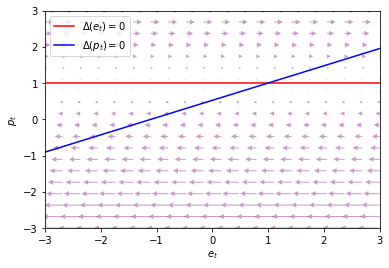

In [42]:
# Execute phase portrait plot
plt.figure()
dornbusch_phasediagram(plt)
plt.show()

We will now solves the dynamic system by hand. *The following questions forming Question 3 get you to master the solution workflow step by step.*

# Question 3.1

Transform and write down the dynamic model as an *autonomous* and *homogenous* linear difference equation system. *Hint*: Do a change of variables, by letting 
$$
z_{t} := \left(
         \begin{matrix}
         e_{t} - e \\
         p_{t} - p
         \end{matrix}
         \right)
$$
The system should have this form: $$z_{t+1} = A z_{t}$$

**Answer 3.1**: (*Edit and type in here*)



<!--
<button data-toggle="collapse" data-target="#sol3-1" class='btn btn-primary'>Solution 3.1</button>
<div id="sol3-1" class="collapse">
-->

We can stack up the homogeneous (**DE**) system as

$$
z_{t+1} = \underbrace{
          \left(
          \begin{matrix}
          1 & \frac{1}{\lambda} \\
          \frac{\alpha\delta}{1-\alpha\sigma} & 1 - \frac{\alpha(\delta+\sigma/\lambda)}{1-\alpha\sigma}
          \end{matrix}
          \right)
          }_{A}
         z_{t}
$$

In [13]:
# Numeric example - to be used later
A = np.array([[ 1.0,              1.0/λ                         ],
              [ α*δ/(1.0 - α*σ),  1.0 - α*(δ + σ/λ)/(1.0 - α*σ) ]])

print(A)

[[ 1.         20.        ]
 [ 0.10055304  0.78883861]]


# Question 3.2

A linear difference equation (system) has a *general solution* that is the sum of its *particular* and *complementary* solution:

$$
x_{t} = z_{t}^{p} + z_{t}^{c}, \qquad t \in \mathbb{N}
$$

In Dornbusch's example, $x_{t} := (e_{t}, p_{t} )$. Calculate the *particular* solution, $z_{t}^{p}$. 

*Hint*: (1) Define the eigenvalues, $\mu$, and (normalized) eigenvector matrix, $P$, of the model's transition map $A$; (2) solve analytically for these objects, $\mu$ and $P$, as functions of the model parameters (i.e., the Greek letters); (3)"diagonalize" your model to find a linear transformed system that is easier to solve; (4) choose or solve for appropriate initial condition that will ensure the solution is a (saddle-path) *stable* trajectory, and express your general solution as a function of time, $t$.

**Answer 3.2**: (*Edit and type in here*)

<!--
<button data-toggle="collapse" data-target="#sol3-2" class='btn btn-primary'>Solution 3.2</button>
<div id="sol3-2" class="collapse">
-->

**Step 0: Particular solution**

Here, the *particular solution* is just the *steady state equilibrium* at $(e,p)$. So $z^{p}_{t} = (e,p)$ for every $t \in \mathbb{N}$.

*Remark*:
* So next, we only need worry about characterizing the stable trajectory ...

* The stability of the system's *steady state equilibrium* (i.e., *particular solution*) depends on whether its *complementary solution* (trajectory) is everywhere convergent onto the steady state.

**Detour: Tools needed**

The complementary solution will depend on these two objects connected with $A$:

* eigenvalues of $A$
* eigenvectors (eigenvector matrix) of $A$

**Step 1: Complementary Solution**

*Definition*. In our 2D system (**DE**), an eigenvalue $\mu_{i}$ of matrix $A$ solves:

$$
f(\mu) = \text{det}(A - \mu_{i} I) = 0, \qquad i \in \{ 1,2\}
$$

In words: An eigenvalue $\mu$ of matrix $A$ is a solution to the matrix characteristic polynomial at zero. In short order, it is *a* root of that polynomial.

If we do a bit more work, by evaluating the determinant, we can derive

$$
f(\mu) = \mu^{2} - \mu (a_{11} +a_{22})+ (a_{11}a_{22} −
a_{12}a_{21}) = 0
$$

Or,
$$
f(\mu) = \mu^{2} - \mu \text{tr}(A) + \text{det}(A) = 0
$$

Note that in this example, since the characteristic polynomial is of second order (a quadratic function), it would have at most 2 distinct eigenvalues.

**Step 1A (Calculate eigenvalues of $A$).** 

The at-most 2 distinct eigenvalues are

$$
\mu_{1}, \mu_{2} = \frac{\text{tr}({A}) \pm \sqrt{[\text{tr}(A)]^{2} - 4\text{det}(A)}}{2}
$$

Let $D(A) := (\text{tr}(A))^{2} - 4\text{det}(A)$ (this is called the discriminant of $A$). If
* $D(A) > 0$ then $\mu_{1}$ and $\mu_{2}$ are distinct real roots
* $D(A) = 0$ then $\mu_{1} = \mu_{2} = \tfrac{1}{2}\text{tr}(A)$ (coincident roots)
* $D(A) < 0$ then $\mu_{1}$ and $\mu_{2}$ are distinct complex roots

In the current example, we have the trace of $A$ as

$$
\text{tr}(A) = 2 - \frac{\alpha}{1-\alpha\sigma}\left(\delta + \frac{\sigma}{\lambda}\right)
$$

and, the determinant of $A$ as

$$
\text{det}(A)  = 1 - \frac{\alpha}{1-\alpha\sigma}\left(\delta + \frac{\sigma}{\lambda}\right) - \frac{\alpha\delta}{\lambda(1-\alpha\sigma)}
$$

In [14]:
# Evaluate numerically

# Option 1: Doing it by hand ...
# ---------------------------------------------------
# Constant on quadratic term
a = 1.0
# trace(A)
b = 2.0 - (α/(1.0 - α*σ))*(δ + σ/λ)
# det(A) - typo in Azariadis' (5.13b) p.49 corrected here
c = 1.0 - α*(δ + σ/λ)/(1.0 - α*σ) - α*δ/(λ*(1.0 - α*σ))
soruhando = []
# Check we didn't screw up in our algebra
soruhando.append(b)
soruhando.append(c)
# Solve for eigenvalues
soruhando.append( (b + np.sqrt(b**2.0 - 4*a*c))/(2*a) )
soruhando.append( (b - np.sqrt(b**2.0 - 4*a*c))/(2*a) )

In [15]:
# Option 2: relying on NumPy ...
# ---------------------------------------------------
sorunumpy = []
sorunumpy.append(np.trace(A))
sorunumpy.append(np.linalg.det(A))
mu_numpy, P = np.linalg.eig(A)
sorunumpy.append(mu_numpy[0])
sorunumpy.append(mu_numpy[1])

In [16]:
# Print results
# ---------------------------------------------------
print("Check that hand solution is correct ...")
sorukeys = ["$tr(A)$", "$det(A)$", "$\mu_{1}$", "$\mu_{2}$"]
show = [soruhando, sorunumpy]
id = pd.Index(["Hand Solved", "Numpy Solved"])
df = pd.DataFrame(show, columns=sorukeys, index=id)
df

Check that hand solution is correct ...


,$tr(A)$,$det(A)$,$\mu_{1}$,$\mu_{2}$
Hand Solved,1.788839,-1.222222,2.316463,-0.527624
Numpy Solved,1.788839,-1.222222,2.316463,-0.527624


**Step 1B (Get eigenvalues and normalized eigenvectors)**. First, note that the matrix of eigenvectors of $A$, denoted by $P := [\tilde{v}_1, \tilde{v}_2]$, satisfies:

$$
(A - \mu_{i}I) \tilde{v}_{i} = 0, \qquad i = 1,2
$$

since $\tilde{v}_i \in \mathbb{R}^{2}$ is the $i$-th eigenvector associated with eigenvalue $\mu_i$ of $A$. This is a system of simultaneous equations for $\tilde{v}_{i}$.

Second, this system is homogeneous of degree 0 in $\tilde{v}_i$. (What does this mean?) So we can normalize each $$
\tilde{v}_i = \left(\begin{matrix}
                v_{i} \\
                1
              \end{matrix}\right)
              \qquad i = 1,2
$$
i.e., by setting its last component to $1$. So now, we have two equations solving for two unknowns!   

Use the last normalization to solve for $v_{i}$, $i=1,2$. We now denote $P$ as the matrix of normalized eigenvectors of $A$:
$$
P 
= \left(\begin{matrix}
                v_{1} & v_{2} \\
                  1   & 1
              \end{matrix}\right)
= \left(\begin{matrix}
    \frac{\mu_1 - a_{22}}{a_{21}} & \frac{\mu_2 - a_{22}}{a_{21}} \\
    1 & 1
  \end{matrix}\right)
$$

In [17]:
print("Hand calculated matrix of normalized eigenvectors, P:")
mu1, mu2 = soruhando[2], soruhando[3]
P_hando = np.ones((2,2))
P_hando[0,0] = (mu1 - A[1,1])/A[1,0]
P_hando[0,1] = (mu2 - A[1,1])/A[1,0]
print(P_hando)

print("\nNumpy calculated matrix of normalized eigenvectors, P:")
P = P/P[1]
print(P)

Hand calculated matrix of normalized eigenvectors, P:
[[ 15.19222401 -13.09222401]
 [  1.           1.        ]]

Numpy calculated matrix of normalized eigenvectors, P:
[[ 15.19222401 -13.09222401]
 [  1.           1.        ]]


**Workflow**

1. Solve transformed sytem for *general (and complementary) solution* in $s_{t}$

2. Use linear transform $z_{t}^{c} \equiv z_{t} = Ps_{t}$ to get back *complementary solution* in $z_{t}^{c}$

3. Add back *steady state equilibrium* point (i.e., *particular solution*), $z^{p}_{t} \equiv (e,p)$, to get *general solution* in $x_{t} = (e_{t}, p_{t})$.

We can do this two ways: by hand, or numerically ...

**Step 1C (Solve diagonalized transforms system)**. Back to our compact summary of *dynamic equilibrium* in terms of the homogenous system

$$
z_{t+1} = A z_{t}
$$

Note: $z_{t} := (e_{t}-e, p_{t}-p)$

Let matrix of eigenvalues of $A$ be

$$
\Lambda := \left(
          \begin{matrix}
          \mu_{1} & 0 \\
          0 & \mu_{2}
          \end{matrix}
          \right)
$$
and matrix of (un-normalized) eigenvectors of $A$ be 

$$
P := [\tilde{v}_1, \tilde{v}_2]
$$

$P$ is of full rank (hence invertible), if eigenvalues are distinct (i.e., $\mu_1 \neq \mu_2$)!

**Fact** (Theorem 23.4, Simon and Blume). If $P$ is full rank
$$
AP = P\Lambda \iff A = P \Lambda P^{-1}
              \iff P^{-1}AP = \Lambda
$$

Assume $P$ full rank. Re-write original system via a linear transform:

$$
z_{t+1} = P\Lambda P^{-1} z_{t}
$$

or, if we let $s_{t} := P^{-1} z_{t}$, then, the decoupled transformed system is:

$$
s_{t+1} = \Lambda s_{t}
$$

In [18]:
# Check P is full rank
rank = np.linalg.matrix_rank(P)
if rank == P.shape[0]:
    print("P has full rank = %i" % (rank))
    print("There exists an invertible solution")
else:
    print("WARNING: P has rank = %i" % (rank))

P has full rank = 2
There exists an invertible solution


**Key message**: 
* Distinct eigenvalues allow for "diagonalization" of $A$
* Admits a transformed system that is decoupled in terms of modified states, $s_{t}$

**Step 1D**. Complementary solution to diagonalized system is given by
$$
\left(\begin{matrix}
                s_{1,t}\\
                s_{2,t}
              \end{matrix}\right)
              = \left(\begin{matrix}
                c_{1}\mu_{1}^{t} \\
                c_{2}\mu_{2}^{t}
                \end{matrix}\right)
$$
where $(c_1, c_2)$ are *undetermined coefficients* which will govern the initial conditions of this tranformed system.


**Step 1E (Invert transform and add particular solution)**. After some linear algebra, we get the general solution as
$$
x_{t} = z^{p} + \underbrace{P s_{t}}_{\text{Invert linear transform }P^{-1} \text{, gets } z_{t}^{c}}
$$
Or, verbosely,
$$
e_{t} = e + c_{1} v_{1}\mu_{1}^{t} + c_{2} v_{2} \mu_{2}^{t}
$$
and
$$
p_{t} = p + c_{1} \mu_{1}^{t} + c_{2} \mu_{2}^{t}
$$

**Step 1F (Select stable equilibrium)**. We know theoretically, one of the eigenvalues will be explosive, $\mu_1 > 1$, but it's good to check ...

Selection mechanism sets $c_1 = 0$, so the general solution becomes:
$$
e_{t} = e + c_{2} v_{2} \mu_{2}^{t}
$$
and
$$
p_{t} = p + c_{2} \mu_{2}^{t}
$$

Last equation determines $c_2 = (p_{0} - p)$, given initial state $p_0$.

*Economics*: Interpretation? 

* Given initial price level of goods, foreign exchange market must react to restore stable equilibrium path

* i.e., $e_{t}$ must "jump" by $c_2$ amount to get onto stable equilibrium trajectory.


# Question 3.3

Now using the parameter values assigned above in [preliminary settings](#prelimsettings), evaluate (i.e., compute) your *general solution* with a few lines of python code, and plot the economy's trajectory. Assume that initial goods price index $p_{0} = p$ (its steady state equilibrium value).

*Hint*: There's more than one way to code this. For the plot, place date $t$ on the horizontal axis of your figure and the realization of the economy's position $(e_{t}, p_{t})$ on two separate vertical axes.





Let's set up our solution routine in a few steps using ``def`` constructs. (This is generally good practice in coding so that you code in modular. This aids in modifying model components for example, without accidentally breaking the rest of the more generic parts of the code.) 

In [19]:
def eignorm(A):
    """Compute eigenvalues and normalized 
    eigenvectors of array A"""
    mu, P = np.linalg.eig(A)
    P = P/P[1]
    return mu, P

In [20]:
def solve_stable(A, initial_state, steady_state):
    """Solve for stable equilibrium (mu, P, c_select)"""
    # Get eigenvalues and (normalized) eigenvectors
    mu, P = eignorm(A)
    if np.linalg.matrix_rank(P) < A.shape[0]:
        print("WARNING: P is multicolinear, system is not invertible")
        return
    else:
        # Boolean list
        stable = (np.absolute(mu) < 1.0)
        unstable = (np.absolute(mu) >= 1.0)
        nz = A.shape[0]
        if stable.sum() < nz:
            print("WARNING: You've some unstable eigenvalues")
            print("\t Ensure you have enough initial conditions for stable roots")
            print("\nStable eigenvalues:")
            print(mu[stable])
            print("\nUnstable eigenvalues:")
            print(mu[unstable])
            mu[unstable] = 0.0
        # Selecting stable equilibrium
        c_select = np.zeros(nz)
        # GENERALIZE THIS? - This currently works for this example with 2 variables
        c_select[stable] = initial_state[stable] - steady_state[stable]
        
    return mu, P, c_select

In [21]:
def general_solution(A, initial_state, steady_state, T):
    """Construct general solution of DE system"""
    # Convert inputs to NumPy arrays
    initial_state, steady_state = np.asarray(initial_state), np.asarray(steady_state)
    # Get stable solution
    mu, P, c_select = solve_stable(A, initial_state, steady_state)
    # Complementary solution at each date t <= T
    s_T = np.ones((A.shape[0],T))
    for t in range(T-1):
        s_T[:,t+1] = np.diag(mu) @ s_T[:,t]
    zcomp = P @ np.diag(c_select) @ s_T
    # Particular solution at each date t <= T
    zpart = np.tile(np.vstack(steady_state),T)
    # General solution
    x = zpart + zcomp
    return {"general":x, "particular":zpart, "complementary":zcomp}

In [22]:
# Generate state and auxiliary solution paths (e, p, r, y)
def dornbusch_aux(state_path, α, ϕ, λ, ybar, mbar):
    epath, ppath = state_path
    rpath = (ϕ*ybar - (mbar - ppath))/λ 
    # Note we lose an observation since inflation is first differenced p(t)
    ypath = np.diff(ppath)/α + ybar
    dppath = np.diff(ppath)
    depath = np.diff(epath)
    dictionary = {"e":epath, "p":ppath, 
                  "r":rpath, "y":ypath, 
                  "Dp":dppath, "De":depath}
    return dictionary

In [23]:
# Actual usage: 

# initial state
x0 = [ess, pss*2.0]
# steady state
xss = [ess, pss]
# compute solution from p0 > pss
solution = general_solution(A, x0, xss, T=10)
# Get all equilibrium outcomes
xpath = solution["general"]
trajectory = dornbusch_aux(xpath, α, ϕ, λ, ybar, mbar)

	 Ensure you have enough initial conditions for stable roots

Stable eigenvalues:
[-0.52762434]

Unstable eigenvalues:
[2.31646295]


In [24]:
# Visualize them
def dornbusch_showpath(yss, trajectory):
    fig, axes = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 0.5, wspace=.25)
    axes = axes.ravel()  
    col = ["red", "blue", "magenta", "brown", "green", "orange"]
    for panel, (key, value) in enumerate(trajectory.items()):
        y = value 
        ys = np.tile(yss[panel], y.size)
        x = np.arange(y.size)
        axes[panel].plot(x, y, color=col[panel], lw=2, marker='o')
        axes[panel].plot(x, ys, color=col[panel], lw=0.75, alpha=0.5)
        axes[panel].set_title(key)
        axes[panel].set_xlabel("Date, $t$")

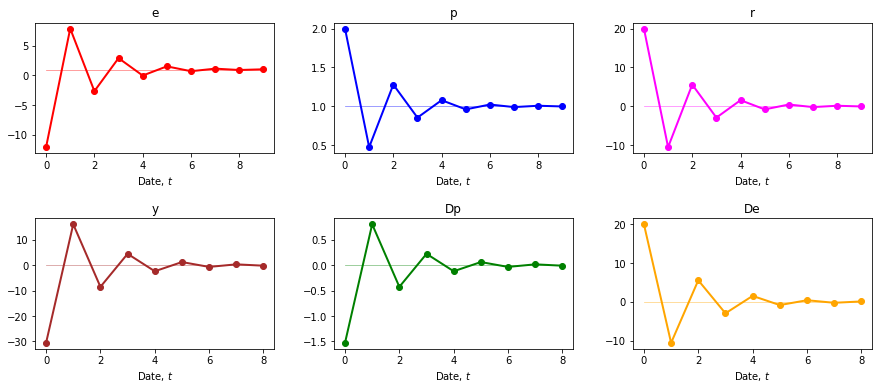

In [25]:
dornbusch_showpath([ess, pss, yss, rss, 0.0, 0.0], trajectory)

In [26]:
def dornbusch_phasedynamics(xpath):
    # Plot graph of dynamic equilibrium map at zero change
    ex, px = dornbusch_diffzero(x)
    plt.plot(x, px, '-r', label="$\Delta(e_{t}) = 0$")
    plt.plot(x, ex, '-b', label="$\Delta(p_{t}) = 0$")
    for t in range(xpath.shape[1]):
        # Extract current pair (e_t, p_t)
        e, p = xpath[:,t]
        plt.plot(e, p, 'o')
        plt.text(e, p, str(t))
    # Plot the vector fields (u,v) at each (x,y)
    Q = plt.quiver(X, Y, u, v, color="purple", alpha=0.3)
    # Axes decoration and attributes
    plt.xlabel('$e_{t}$')
    plt.ylabel('$p_{t}$')
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    plt.legend()
    plt.show()
    return plt

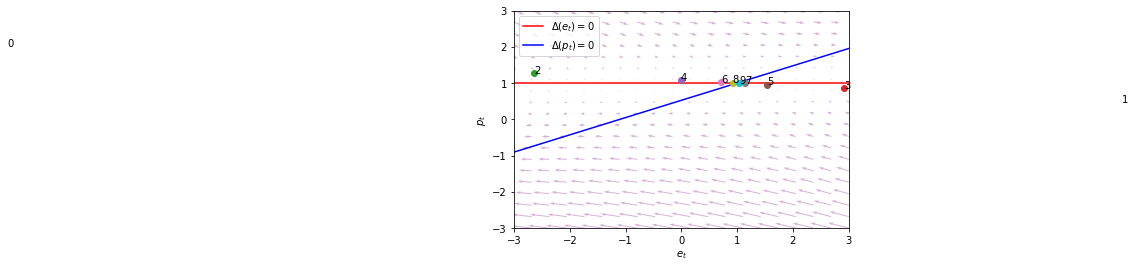

In [27]:
# Execute phase portrait plot
plt.figure()
plt = dornbusch_phasedynamics(xpath)
plt.show()

Let's stare at the dynamics in $(e_t, p_t)$ space a bit more ...


		  ... 乒 乓 time!


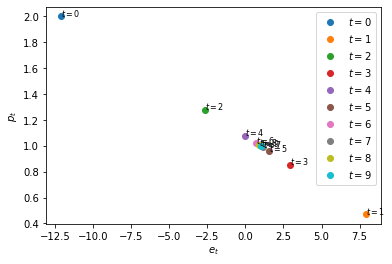

In [28]:
print("\n\t\t  ... 乒 乓 time!")
plt.figure()
for t in range(xpath.shape[1]):
    plt.plot(xpath[0,t], xpath[1,t], 'o', label="$t=$"+str(t))
    plt.text(xpath[0,t], xpath[1,t], "$t=$"+str(t), fontsize=8)
plt.xlabel("$e_{t}$")
plt.ylabel("$p_{t}$")
plt.legend()
plt.show()

乒乓 (*noun.*) ping pong

**Discussion**

Earlier, we have analytically shown that the long run equilibrium is a little fragile: 
* it is not stable from anywhere
* i.e., one eigenvalue is stable (less than one in absolute value), and another that is unstable (explosive/indeterminate)

**Saddle path stable equilibrium**: It depends on how you "select" the trajectory, $(c_1, c_2)$

* **Technical implementation**: Shut out the contribution of the explosive path (see decoupled system), $c_1 = 0$.

* **Economic interpretation**: 
    * Given price level, $p_0$ market must pick an exchange rate path, by jumping immediately to $e_0$ to get onto a dynamic equilibrium path that is stable (i.e., converges to the steady state)
    * i.e., a no-asset bubbles equilibrium path
    * Justification for this selection device? Agents in the markets are forward looking: They have perfect foresight expectations, hence the immediate jump in $e_0$ to restore stable equilibrium given initially $p_0 > p$ in our example. They know that the goods price index $p_{t}$ is sticky, so the financial/foreign-exchange market must bear the brunt of equilibriating the economy along its transition path. Hence the result that the exchange rate overshoots its long run path along the transition.  

# Question 4 (Homework, Case Study)

Consider the following experiments, assuming the economy is at the baseline-parametrized steady state equilibrium:

1. An unanticipated date-$0$ once-and-forever ("permanent") doubling in money supply $\bar{m}$.

2. An unanticipated date-$0$ once-and-forever ("permanent") doubling in foreign nominal interest $r^{\ast}$.

Plot the resulting time paths of nominal exchange rate, price level, output and interest in each experiment.

Provide a verbal interpretation of each experiment, and an explanation of each experiment's consequences.

**Suggested Answer 4.1.** Expect to get a new steady state (long run) equilibrium with higher price level and nominal exchange rate, but no real effects on $y$ or $r$. An overshooting dynamic in the short run, again because of the sticky price friction $\alpha$ in this model. How did we get this so-called intuition? To verify that, we can use a tool from high-school calculus called total differentiation.

**Step 1.** Write the long run (steady state) equilibrium system of equation as
$$
y = -\sigma r + \delta (e + p^{\ast} - p)
\\
r = \frac{1}{\lambda}\left[ \phi \bar{y} + p - \bar{m} \right]
\\
y = \bar{y}
\\
r = r^{\ast}
$$
Recall these are, respectively, the IS, MP, AS and UIP conditions, evaluated at a steady state equilibrium point: $e_{t} = e$ and $p_{t} = p$, for all dates $t$. (Be very mindful of your notation here: What are endogenous variables, what are exogenous variable, and what are model parameters?)

**Step 2.** Take the total differential of the system of steady-state equations:
$$
\text{d}y = -\sigma \text{d}r + \delta (\text{d}e + \text{d}p^{\ast} - \text{d}p)
\\
\text{d}r = \frac{1}{\lambda}\left[ \phi \text{d}\bar{y} + \text{d}p - \text{d}\bar{m} \right]
\\
\text{d}y = \text{d}\bar{y}
\\
\text{d}r = \text{d}r^{\ast}
$$

**Step 3.** Re-write Step 2 in matrix notation. (We'll see why this is useful later.)
$$
\underbrace{
\left(
\begin{matrix}
-\delta & \delta & 1 & \sigma \\
0 & -1/\lambda & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{matrix}
\right)}_{F}
\left(
\begin{matrix}
\text{d}e \\
\text{d}p \\
\text{d}y \\
\text{d}r \\
\end{matrix}
\right) = \underbrace{
\left(
\begin{matrix}
\delta \text{d}p^{\ast} \\
(\phi/\lambda)\text{d}\bar{y} -(1/\lambda) \text{d}\bar{m} \\
\text{d}\bar{y} \\
\text{d}r^{\ast} \\
\end{matrix}
\right)}_{g}
$$

**Step 4.** Apply [Cramer's Rule](https://en.wikipedia.org/wiki/Cramer%27s_rule) and we can solve for the total differential of each endogenous variable:
$$
\text{d}e = \frac{\text{det}\left( \left[
                    \begin{matrix}
                    \delta \text{d}p^{\ast} & \delta & 1 & \sigma \\
                    (\phi/\lambda)\text{d}\bar{y}-(1/\lambda)\text{d}\bar{m} & -1/\lambda & 0 & 1 \\
                    \text{d}\bar{y} & 0 & 1 & 0 \\
                    \text{d}r^{\ast} & 0 & 0 & 1 \\
                    \end{matrix}
                \right]\right)}{\text{det}(F)}
\\
\text{d}p = \frac{\text{det}\left( \left[
                    \begin{matrix}
                    -\delta & \delta \text{d}p^{\ast}  & 1 & \sigma \\
                    0 & (\phi/\lambda)\text{d}\bar{y}-(1/\lambda)\text{d}\bar{m} & 0 & 1 \\
                    0 & \text{d}\bar{y}  & 1 & 0 \\
                    0 & \text{d}r^{\ast}  & 0 & 1 \\
                    \end{matrix}
                \right]\right)}{\text{det}(F)}
\\
\text{d}y = \frac{\text{det}\left( \left[
                    \begin{matrix}
                    -\delta & \delta & \delta \text{d}p^{\ast} & \sigma \\
                    0 & -1/\lambda & (\phi/\lambda)\text{d}\bar{y}-(1/\lambda)\text{d}\bar{m} & 1 \\
                    0 & 0 & \text{d}\bar{y} & 0 \\
                    0 & 0 & \text{d}r^{\ast} & 1 \\
                    \end{matrix}
                \right]\right)}{\text{det}(F)}
\\
\text{d}r = \frac{\text{det}\left( \left[
                    \begin{matrix}
                    -\delta & \delta & 1 & \delta \text{d}p^{\ast} \\
                    0 & -1/\lambda & 0 & (\phi/\lambda)\text{d}\bar{y}-(1/\lambda)\text{d}\bar{m} \\
                    0 & 0 & 1 & \text{d}\bar{y} \\
                    0 & 0 & 0 & \text{d}r^{\ast} \\
                    \end{matrix}
                \right]\right)}{\text{det}(F)}
$$
That is, having accounted for direct and indirect effects, we have decomposed the *total variation of each endogenous variable* as a *sum of each exogenous cause*, in the model.

In [29]:
# Do symbolic math
from sympy import *
# Render pretty math in SymPy
init_printing() 
# Bind symbols
a, d, f, l, s = symbols('alpha delta phi lambda sigma')
drstar, dpstar, dybar, dmbar = symbols('d_r* d_p* d_ybar d_mbar')
# print(printing.latex(dpst))

# LHS
F = Matrix([[ d, -d,   1,     s  ],
            [ 0, -1/l, 0,     1  ],
            [ 0, 0,    1,     0  ],
            [ 0, 0,    0,     1  ],
           ])
# RHS
g = Matrix([[ d*dpstar                  ],
            [ (f/l)*dybar - (1/l)*dmbar ],
            [ dybar                     ],
            [ drstar                    ],
           ])

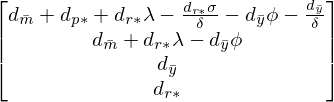

In [30]:
# Option 1: Hard code Cramer's rule (just for fun)
D = F.det()
Dx = []
for i in range(F.shape[0]):
    f = F.copy()
    f[:,i] = g
    Dx.append(f.det()/D)
Dx = simplify(Matrix(Dx))    
Dx

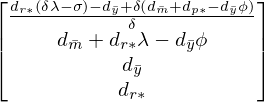

In [31]:
# Option 2: Just take inverse of A and premultiply with g
# where dx := (de, dp, dy, dr)
dx = F.inv() @ g
simplify(dx)

Let's switch from ``SymPy`` notation back to nicer math notation. Below, we type out the answer above a bit more nicely for your pretty eyes:
$$
\text{de} = \left(\lambda - \frac{\sigma}{\delta}\right) \text{d}r^{\ast}+ 1 \cdot \text{d}p^{\ast}- \left(\phi+ \frac{1}{\delta}\right) \text{d}\bar{y}+ 1 \cdot\text{d}\bar{m}
$$
$$
\text{dp} = \lambda \text{d}r^{\ast}+ 0 \cdot \text{d}p^{\ast}-\phi \text{d}\bar{y}+ 1\text{d}\bar{m}
$$
$$
\text{dy} = 0 \cdot \text{d}r^{\ast}+ 0 \cdot \text{d}p^{\ast}+ 1\cdot \text{d}\bar{y}+ 0 \cdot \text{d}\bar{m}
$$
$$
\text{dr} = 1 \cdot \text{d}r^{\ast}+ 0 \cdot\text{d}p^{\ast}+ 0 \cdot \text{d}\bar{y}+ 0 \cdot \text{d}\bar{m}
$$
Again, Step 4 had just allowed us to decompose the *total variation of each endogenous variable* as a *sum of variations in each exogenous cause*, in the model. This has taken into account the direct and indirect causal channels running from the exogenous factors to the endogenous variables.

Remarks:

* The interpretation here is that the infinitesimal (marginal) variation of an endogenous variable in the system of equations is due to direct and indirect (via other endogenous variables) marginal changes in exogenous variables. The indirect effects show up as nonzero off-diagonal elements in matrix $F$. The direct effects of each exogenous variable on the endogenous variables are given by the elements of matrix $G$. 

* This total differential system is a linear map and the "loading factors" that measure the magnitude of the marginal changes are constants because our model is an affine system to begin with. More generally, even if the model is a nonlinear system of equations, the [total differential system is still a linear map, but the loading factors are more general partial derivative functions of the variables (evaluated at a given point)---i.e., a Jacobian matrix](https://youtu.be/2bF6H_xu0ao).

The way to read these and use them for comparative steady states (i.e., statics) is as follows. For example, you might be interested in the experiment on how big, and in what direction, a change in an exogenous variable like potential output $\bar{y}$ would have on the long run exchange rate $e$, *ceteris paribus*. All else constant (i.e., setting $\text{d}r^{\ast} = \text{d}p^{\ast} = \text{d}\bar{m}=0$), we have
$$
\frac{\text{d}e}{\text{d}\bar{y}} = - \left(\phi + \frac{1}{\delta}\right) < 0.
$$
So, having accounted for direct and indirect margins of the causal mechanism, this tells us that a, say $\text{d}\bar{y} = 1\%$, increase in potential output causes a $\left(\phi + {1}/{\delta}\right) \times 1\%$ decrease in long run $e$.

*Trivia*: Why do you think we can use the word "*causes*" here, rather than just saying "*associates with*"? Think.

**Conclusion to 4.1.** So from the last step (option 1 or 2), we can deduce that the steady-state comparative statics give us
$$
\frac{\text{d}e}{\text{d}\bar{m}} = 1,
\qquad
\frac{\text{d}p}{\text{d}\bar{m}} = 1,
\\
\frac{\text{d}y}{\text{d}\bar{m}} = 0,
\qquad
\frac{\text{d}r}{\text{d}\bar{m}} = 0.
$$
**Interpretation**: These derivatives have now incorporated all the direct and indirect channels of a small perturbation in $\bar{m}$ at the current steady state equilibrium. 

So what's the economic insight from these derivative functions evaluated at a long run equilibrium?

This says that, a $1\%$ increase in money supply, i.e., $d\bar{m} = 1\%$, *causes* a $1\%$ increase in domestic price level and the nominal exchange rate, i.e., $de = 1$ and $dp = 1$. It has neutral effects on output $y$ and domestic interest $r$, in the *long run*. Thus monetary policy has no real effects in the long run. Because this is a small open economy model, long run interest rate would equal that of the foreign interest rate.

Now we can also see the short run transitions following from the permanent changes in  the experiments above:

In [32]:
def main(initial_state, T=150, α = 0.05, δ = 2.0, λ = 0.05, σ = 0.11,
            ϕ = 1.0, mbar = 1.0, rstr = 0.01, pstr = 0.0):
    """Main method to solve an instance of the Dornbusch model"""
    # Pack parameters in a dictionary
    parameters = {"alpha":α, "delta":δ, "lambda":λ, "sigma":σ,
                  "phi":ϕ, "mbar":mbar, "rstar":rstr, 
                  "pstar":pstr, "ybar":ybar
                 }
    # 2D system (e, p)
    A = np.array([[ 1.0,              1.0/λ                         ],
                  [ α*δ/(1.0 - α*σ),  1.0 - α*(δ + σ/λ)/(1.0 - α*σ) ]])
    # Calculate steady state
    ess, pss, rss, yss = dornbusch_steady(α, λ, ϕ, σ, δ, mbar, pstr, rstr)
    steady = {"e":ess, "p":pss, "r":rss, "y":yss, "Dp": 0.0, "De": 0.0}
    steady_state = [ steady["e"], steady["p"] ]
    # Calculate general solution
    sol = general_solution(A, initial_state, steady_state, T)
    state_path = sol["general"]
    path = dornbusch_aux(state_path, α, ϕ, λ, yss, mbar)
    # Stuff you can extract
    out = {"parameters":parameters, "A":A, "steady":steady, "path":path}
    return out

In [33]:
def dornbusch_demo(initial_state,T=150,α = 0.05, δ = 2.0, 
                   λ = 0.05, σ = 0.11, ϕ = 1.0, mbar = 1.0, 
                   rstr = 0.01, pstr = 0.0):
    """Demo wrapper for doing comparative dynamics"""
    results = main(initial_state,T,α,δ,λ,σ,ϕ,mbar,rstr,pstr)
    yss = results["steady"]
    yss = list(yss.values())
    y = results["path"]
    dornbusch_showpath(yss, y)

In [34]:
# Comparative dynamics: interactive
from ipywidgets import interact, fixed

interact(dornbusch_demo, 
         initial_state=fixed([ess, pss]), 
         T=fixed(12), 
         α = [0.05, 0.06, 0.07],
         mbar=(1.0,2.0),
         δ = fixed(2.0), 
         λ = [0.05, 0.10], 
         σ = fixed(0.11), 
         ϕ = fixed(1.0), 
         rstr=[0.01, 0.10, 0.30, 0.50, 0.90], 
         pstr = [0.0, 20.0], 
        )
plt.show()

interactive(children=(Dropdown(description='α', options=(0.05, 0.06, 0.07), value=0.05), Dropdown(description=…

**Modelling Insight**. Recall the long run results accord with the toy model intuitions from our AD-AS graphical models? The benefit here from using an explicit mathematical model is that we can be more *precise* about cause and effect in terms of the dynamics in the short run, and also in terms of the long run changes too. 

Note: *Accuracy* of the resulting numerical insights is another tough matter. Being *precise* in our modelling does not imply being *accurate* (i.e., being close to empirical facts).

# Question 5 (Homework, Case Study)

Consider the following experiments, assuming the economy is at the baseline-parametrized steady state equilibrium:

1. An unanticipated date-$0$ one-time doubling in money supply $\bar{m}$ (then returning to the baseline again at date $1$.)

2. An unanticipated date-$0$ one-time doubling in money supply in foreign nominal interest $r^{\ast}$ (then returning to the baseline again at date $1$.)

Plot the resulting time paths of nominal exchange rate, price level, output and interest in each experiment.

Provide a verbal interpretation of each experiment, and an explanation of each experiment's consequences.

# Conclusion

Economic insight from Dornbusch (1976):

* Key model parameter $\alpha$ - partial adjust of price level to economic activity (demand side)

* Because goods prices are "sticky" (smaller $\alpha$), "something's gotta give ..."

* Foreign exchange market price $e_{t}$ must jump to overcompensate in response to shifts to the economy, e.g., an increase in $\bar{m}$ (money supply)

* Exchange rate and output overshoot their long run equilibrium

* Convergence back to long run point is gradual, because of sticky-price *assumption*